In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from itertools import combinations_with_replacement 

In [2]:
df = pd.read_csv('./dataset/data.csv')
df.sample(10)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [3]:
df = df.drop(columns=['Unnamed: 32', 'id'])

In [4]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', len(df.columns))

In [6]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
355,B,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,0.1533,0.06184,0.3602,1.4780,3.212,27.49,0.009853,0.04235,0.062710,0.019660,0.02639,0.004205,13.37,22.43,89.02,547.4,0.10960,0.2002,0.23880,0.09265,0.2121,0.07188
441,M,17.270,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.05736,0.1467,0.05407,0.5100,1.6790,3.283,58.38,0.008109,0.04308,0.049420,0.017420,0.01594,0.003739,20.38,35.46,132.80,1284.0,0.14360,0.4122,0.50360,0.17390,0.2500,0.07944
347,B,14.760,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.03528,0.1521,0.05912,0.3428,0.3981,2.537,29.06,0.004732,0.01506,0.018550,0.010670,0.02163,0.002783,17.27,17.93,114.20,880.8,0.12200,0.2009,0.21510,0.12510,0.3109,0.08187
254,M,19.450,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.08591,0.1776,0.05647,0.5959,0.6342,3.797,71.00,0.004649,0.01800,0.027490,0.012670,0.01365,0.002550,25.70,24.57,163.10,1972.0,0.14970,0.3161,0.43170,0.19990,0.3379,0.08950
193,M,12.340,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,0.4053,1.8090,2.642,34.44,0.009098,0.03845,0.037630,0.013210,0.01878,0.005672,15.65,39.34,101.70,768.9,0.17850,0.4706,0.44250,0.14590,0.3215,0.12050
470,B,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,0.3776,1.3500,2.569,22.73,0.007501,0.01989,0.027140,0.009883,0.01960,0.003913,11.14,25.62,70.88,385.2,0.12340,0.1542,0.12770,0.06560,0.3174,0.08524
137,B,11.430,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.01521,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.11900,0.1648,0.13990,0.08476,0.2676,0.06765
290,B,14.410,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.06602,0.1714,0.07192,0.8811,1.7700,4.360,77.11,0.007762,0.10640,0.099600,0.027710,0.04077,0.022860,15.77,22.13,101.70,767.3,0.09983,0.2472,0.22200,0.10210,0.2272,0.08799
222,B,10.180,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,0.06908,0.2467,1.2170,1.641,15.05,0.007899,0.01400,0.008534,0.007624,0.02637,0.003761,11.17,22.84,71.94,375.6,0.14060,0.1440,0.06572,0.05575,0.3055,0.08797
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.038320,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758


In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df.shape

(569, 31)

In [9]:
with open('./dataset/wdbc.names', 'r') as files:
    for file in files:
        print(file.strip())

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators:

Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

W.N. Street, W.H. Wolberg and O.L. Mangasarian
Nuclear feature extraction for breast tumor diagnosis.
IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

O.L. Mangasarian, W.N. Street and W.H. Wolberg.
Breast cancer diagnosis and prognosis via linear programming.
Operations Research, 43(4), pages 570-577, July-Augu

In [10]:
numerik_df = df[df.describe().columns]
kategori_df = df.drop(columns=numerik_df.columns)

display(numerik_df.sample(10))
display(kategori_df.sample(10))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
116,8.950,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,0.1305,0.07163,0.3132,0.9789,3.280,16.94,0.018350,0.067600,0.09263,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722
176,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.037160,0.1669,0.08116,0.4311,2.2610,3.132,27.48,0.012860,0.088080,0.11970,0.024600,0.03880,0.017920,11.260,24.39,73.07,390.2,0.13010,0.29500,0.34860,0.09910,0.2614,0.11620
243,13.750,23.77,88.54,590.0,0.08043,0.06807,0.046970,0.023440,0.1773,0.05429,0.4347,1.0570,2.829,39.93,0.004351,0.026670,0.03371,0.010070,0.02598,0.003087,15.010,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321
500,15.040,16.74,98.73,689.4,0.09883,0.13640,0.077210,0.061420,0.1668,0.06869,0.3720,0.8423,2.304,34.84,0.004123,0.018190,0.01996,0.010040,0.01055,0.003237,16.760,20.43,109.70,856.9,0.11350,0.21760,0.18560,0.10180,0.2177,0.08549
25,17.140,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.140100,0.3040,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.037990,0.03732,0.023970,0.02308,0.007444,22.250,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
315,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.1716,0.7151,1.047,12.69,0.004928,0.003012,0.00262,0.003390,0.01393,0.001344,13.340,19.71,84.48,544.2,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174
535,20.550,20.86,137.80,1308.0,0.10460,0.17390,0.208500,0.132200,0.2127,0.06251,0.6986,0.9901,4.706,87.78,0.004578,0.026160,0.04005,0.014210,0.01948,0.002689,24.300,25.48,160.20,1809.0,0.12680,0.31350,0.44330,0.21480,0.3077,0.07569
520,9.295,13.90,59.96,257.8,0.13710,0.12250,0.033320,0.024210,0.2197,0.07696,0.3538,1.1300,2.388,19.63,0.015460,0.025400,0.02197,0.015800,0.03997,0.003901,10.570,17.84,67.84,326.6,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982
166,10.800,9.71,68.77,357.6,0.09594,0.05736,0.025310,0.016980,0.1381,0.06400,0.1728,0.4064,1.126,11.48,0.007809,0.009816,0.01099,0.005344,0.01254,0.002120,11.600,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
330,16.030,15.51,105.80,793.2,0.09491,0.13710,0.120400,0.070410,0.1782,0.05976,0.3371,0.7476,2.629,33.27,0.005839,0.032450,0.03715,0.014590,0.01467,0.003121,18.760,21.98,124.30,1070.0,0.14350,0.44780,0.49560,0.19810,0.3019,0.09124


,diagnosis
466,B
107,B
204,B
411,B
141,M
35,M
324,B
389,M
30,M
294,B


In [11]:
class PlotFeatures:
    def __init__(self, df, target_cols, par=1, combinations=True):
        self.par = par
        self.data = df
        self.combinations = combinations
        self.target_cols = target_cols

    def get_layout_axes(self):
        from itertools import combinations_with_replacement 
        get_values_comb_1 = combinations_with_replacement(self.target_cols, 2)
        get_values_comb_2 = combinations_with_replacement(self.target_cols, 2)  
        
        map = {}
        arr = []

        if self.par > 0:
            if self.combinations:
                k = int(len(list(get_values_comb_1)) / self.par)
            else:
                k = int(len(self.target_cols) / self.par)

            for i in range(1, k):
                for j in range(i, k - i):
                    map[i*j] = (i, j)

            for i in range(1, self.par):
                arr.append(k*i)
        else:
             raise Exception('Nilai par anda masukkan bernilai 0 atau negatif!!!')

        self.comb = list(get_values_comb_2)
        self.layout = map.get(k) or map[min(map.keys(), key=lambda key: abs(key-k))]
        self.indices = arr

    def plot_features(self, target='all', kind='scatter', figsize=(20, 80), target_idx=(0,1), **kwargs):
        params_style = {
            'data': None,
            'x': None,
            'y': None,
            'hue': None,
            'weights': None,
            'stat': 'count',
            'bins': 'auto',
            'binwidth': None,
            'binrange': None,
            'discrete': None,
            'cumulative': False,
            'common_bins': True,
            'common_norm': True,
            'multiple': 'layer',
            'element': 'bars',
            'fill': True,
            'shrink': 1,
            'kde': False,
            'kde_kws': None,
            'line_kws': None,
            'thresh': 0,
            'pthresh': None,
            'pmax': None,
            'cbar': False,
            'cbar_ax': None,
            'cbar_kws': None,
            'palette': None,
            'hue_order': None,
            'hue_norm': None,
            'color': None,
            'log_scale': None,
            'legend': True,
            'ax': None,
            'size': None,
            'style': None,
            'units': None,
            'row': None,
            'col': None,
            'col_wrap': None,
            'row_order': None,
            'col_order': None,
            'sizes': None,
            'size_order': None,
            'size_norm': None,
            'markers': None,
            'dashes': True,
            'style_order': None,
            'kind': 'scatter',
            'height': 5,
            'aspect': 1,
            'facet_kws': None,
            'estimator': 'mean',
            'errorbar': ('ci', 95),
            'n_boot,': 1000,
            'seed': None,
            'orient': None,
            'sort': True,
            'err_style': 'band',
            'err_kws': None,
            'ci': 95,
            'order_cat': None,
            'order_int': None,
            'saturation': 0.75,
            'width': 0.8,
            'dodge': True,
            'fliersize': 5,
            'linewidth': None,
            'whis': 1.5,
            'ata': None,
            'bw': 'scott',
            'cut': 2,
            'scale': 'area',
            'scale_hue': True,
            'gridsize': 100,
            'inner': 'box',
            'split': False,
            'x_estimator': None,
            'x_bins': None,
            'x_ci': 'ci',
            'scatter': True,
            'fit_reg': True,
            'n_boot': 1000,
            'logistic': False,
            'lowess': False,
            'robust': False,
            'logx': False,
            'x_partial': None,
            'y_partial': None,
            'truncate': True,
            'dropna': True,
            'x_jitter': None,
            'y_jitter': None,
            'label': None,
            'marker': 'o',
            'scatter_kws': None,
        }

        for i in params_style:
            if i in kwargs:
                params_style[i] = kwargs[i]

        plt.figure(figsize=figsize)

        if kind == 'scatter':

            if self.par > 1:
                lower = self.indices[0]
                upper = self.indices[-1]

            if self.par > 2:
                middle_1 = self.indices[target_idx[0]]
                middle_2 = self.indices[target_idx[1]]
            
            for idx, col in \
            enumerate(self.comb[upper:]) if target=='upper' else \
            enumerate(self.comb[middle_1:middle_2]) if target=='middle' else \
            enumerate(self.comb[:lower]) if target=='lower' else enumerate(self.comb):

                plt.subplot(max(self.layout)+1,min(self.layout),idx+1)
                sns.scatterplot(data=self.data, x=col[0], y=col[1], hue=params_style['hue'], size=params_style['size'], style=params_style['style'], palette=params_style['palette'], hue_order=params_style['hue_order'], hue_norm=params_style['hue_norm'], sizes=params_style['sizes'], size_order=params_style['size_order'], size_norm=params_style['size_norm'], markers=params_style['markers'], style_order=params_style['style_order'], legend=params_style['legend'], ax=params_style['ax'])
            
        elif kind == 'hist':
            for idx, col in enumerate(np.unique(self.comb)):
                plt.subplot(max(self.layout) + 1, min(self.layout), idx+1)
                sns.histplot(data=self.data, x=col, y=params_style['y'], hue=params_style['hue'], weights=params_style['weights'], stat=params_style['stat'], bins=params_style['bins'], binwidth=params_style['binwidth'], binrange=params_style['binrange'], discrete=params_style['discrete'], cumulative=params_style['cumulative'], common_bins=params_style['common_bins'], common_norm=params_style['common_norm'], multiple=params_style['multiple'], element=params_style['element'], fill=params_style['fill'], shrink=params_style['shrink'], kde=params_style['kde'], kde_kws=params_style['kde_kws'], line_kws=params_style['line_kws'], thresh=params_style['thresh'], pthresh=params_style['pthresh'], pmax=params_style['pmax'], cbar=params_style['cbar'], cbar_ax=params_style['cbar_ax'], cbar_kws=params_style['cbar_kws'], palette=params_style['palette'], hue_order=params_style['hue_order'], hue_norm=params_style['hue_norm'], color=params_style['color'], log_scale=params_style['log_scale'], legend=params_style['legend'], ax=params_style['ax'])

        elif kind == 'regplot':
                if self.par > 1:
                    lower = self.indices[0]
                    upper = self.indices[-1]

                if self.par > 2:
                    middle_1 = self.indices[target_idx[0]]
                    middle_2 = self.indices[target_idx[1]]

                for idx, col in \
                    enumerate(self.comb[upper:]) if target=='upper' else \
                    enumerate(self.comb[middle_1:middle_2]) if target=='middle' else \
                    enumerate(self.comb[:lower]) if target=='lower' else enumerate(self.comb):
                    
                    plt.subplot(max(self.layout) + 5, min(self.layout), idx+1)
                    sns.regplot(data=self.data, x=col[0], y=col[1], x_estimator=params_style['x_estimator'], x_bins=params_style['x_bins'], x_ci=params_style['x_ci'], scatter=params_style['scatter'], fit_reg=params_style['fit_reg'], ci=params_style['ci'], n_boot=params_style['n_boot'], units=params_style['units'], seed=params_style['seed'], order=params_style['order_int'], logistic=params_style['logistic'], lowess=params_style['lowess'], robust=params_style['robust'], logx=params_style['logx'], x_partial=params_style['x_partial'], y_partial=params_style['y_partial'], truncate=params_style['truncate'], dropna=params_style['dropna'], x_jitter=params_style['x_jitter'], y_jitter=params_style['y_jitter'], label=params_style['label'], color=params_style['color'], marker=params_style['marker'], scatter_kws=params_style['scatter_kws'], line_kws=params_style['line_kws'], ax=params_style['ax'])

        elif kind == 'boxplot':
            for idx, col in enumerate(np.unique(self.comb)):
                plt.subplot(max(self.layout) + 1, min(self.layout), idx+1)
                sns.boxplot(data=self.data, x=col, y=params_style['y'], hue=params_style['hue'], order=params_style['order_cat'], hue_order=params_style['hue_order'], orient=params_style['orient'], color=params_style['color'], palette=params_style['palette'], saturation=params_style['saturation'], width=params_style['width'], dodge=params_style['dodge'], fliersize=params_style['fliersize'], linewidth=params_style['linewidth'], whis=params_style['whis'], ax=params_style['ax'])

        elif kind == 'violinplot':
            for idx, col in enumerate(np.unique(self.comb)):
                plt.subplot(max(self.layout) + 1, min(self.layout), idx+1)
                sns.violinplot(data=self.data, x=col, y=params_style['y'], hue=params_style['hue'], order=params_style['order_cat'], hue_order=params_style['hue_order'], bw=params_style['bw'], cut=params_style['cut'], scale=params_style['scale'], scale_hue=params_style['scale_hue'], gridsize=params_style['gridsize'], width=params_style['width'], inner=params_style['inner'], split=params_style['split'], dodge=params_style['dodge'], orient=params_style['orient'], linewidth=params_style['linewidth'], color=params_style['color'], palette=params_style['palette'], saturation=params_style['saturation'], ax=params_style['ax'])

        plt.tight_layout()
        plt.show()

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


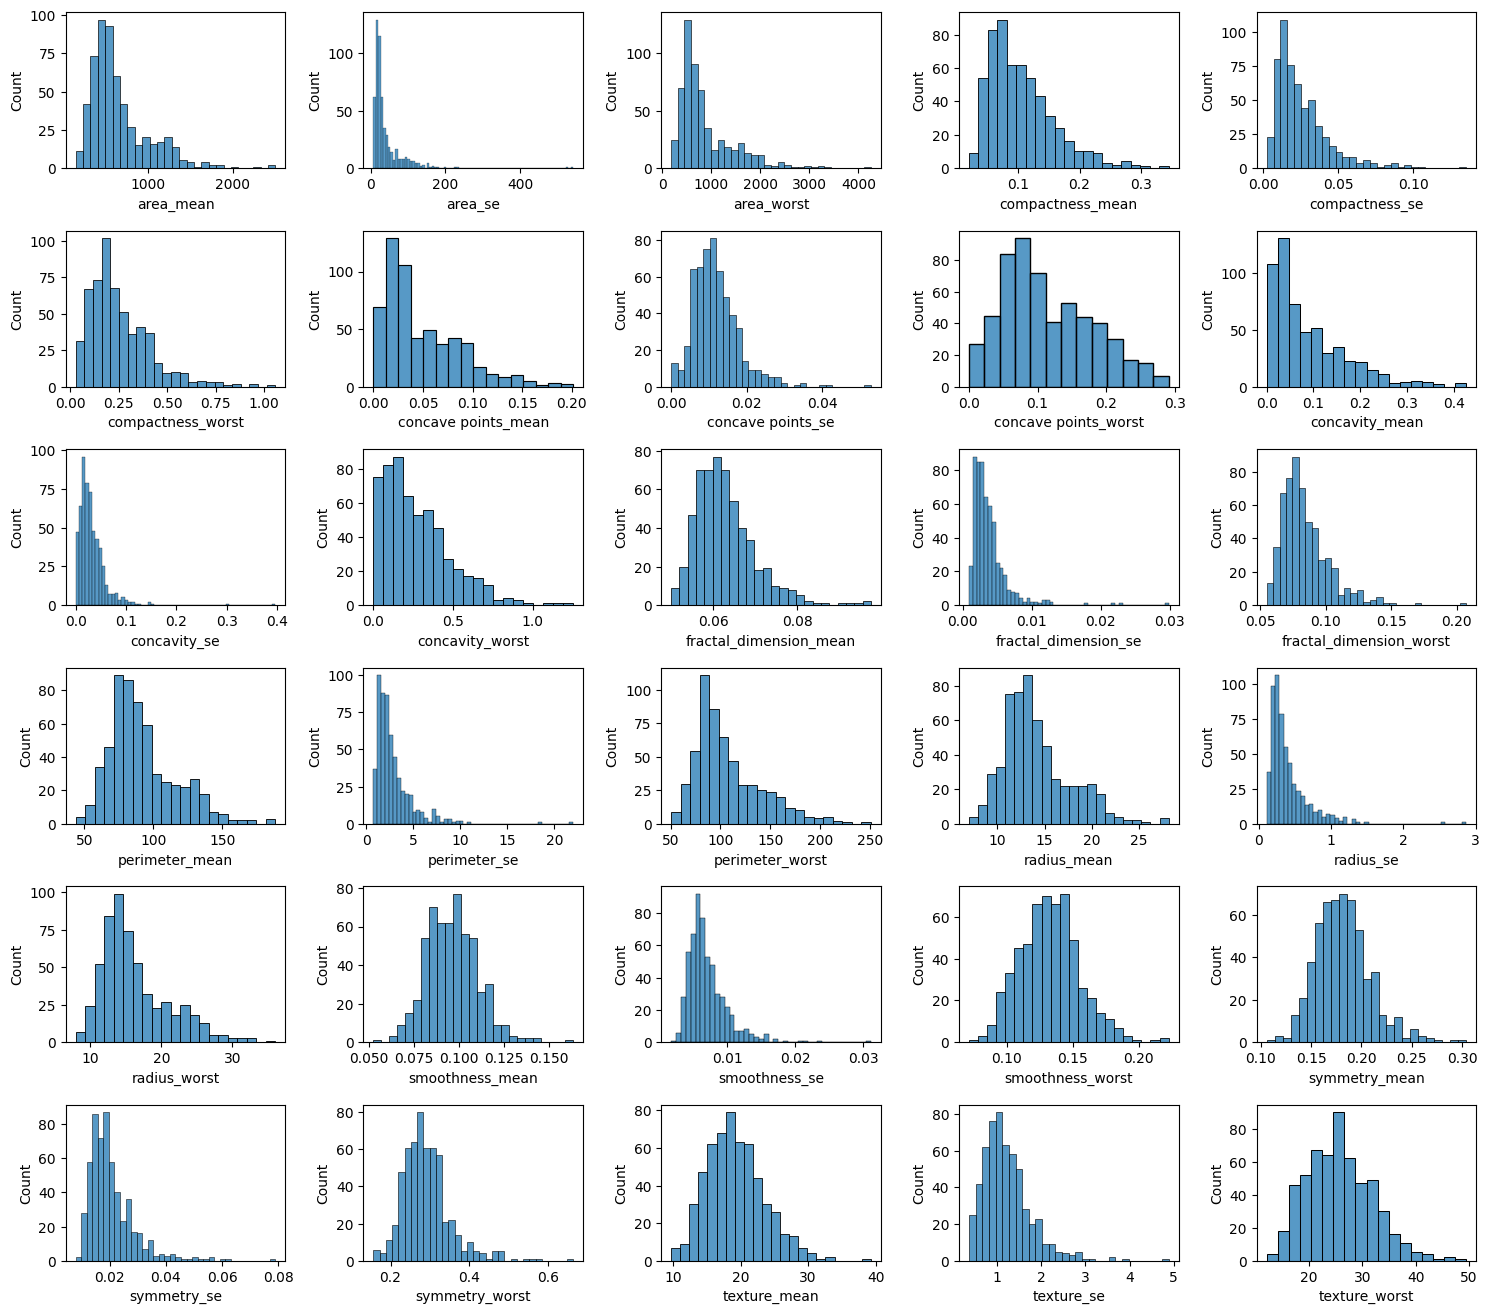

In [13]:
plot_hist = PlotFeatures(df, numerik_df.columns, combinations=False)
plot_hist.get_layout_axes()

plot_hist.plot_features(kind='hist', figsize=(15,15))

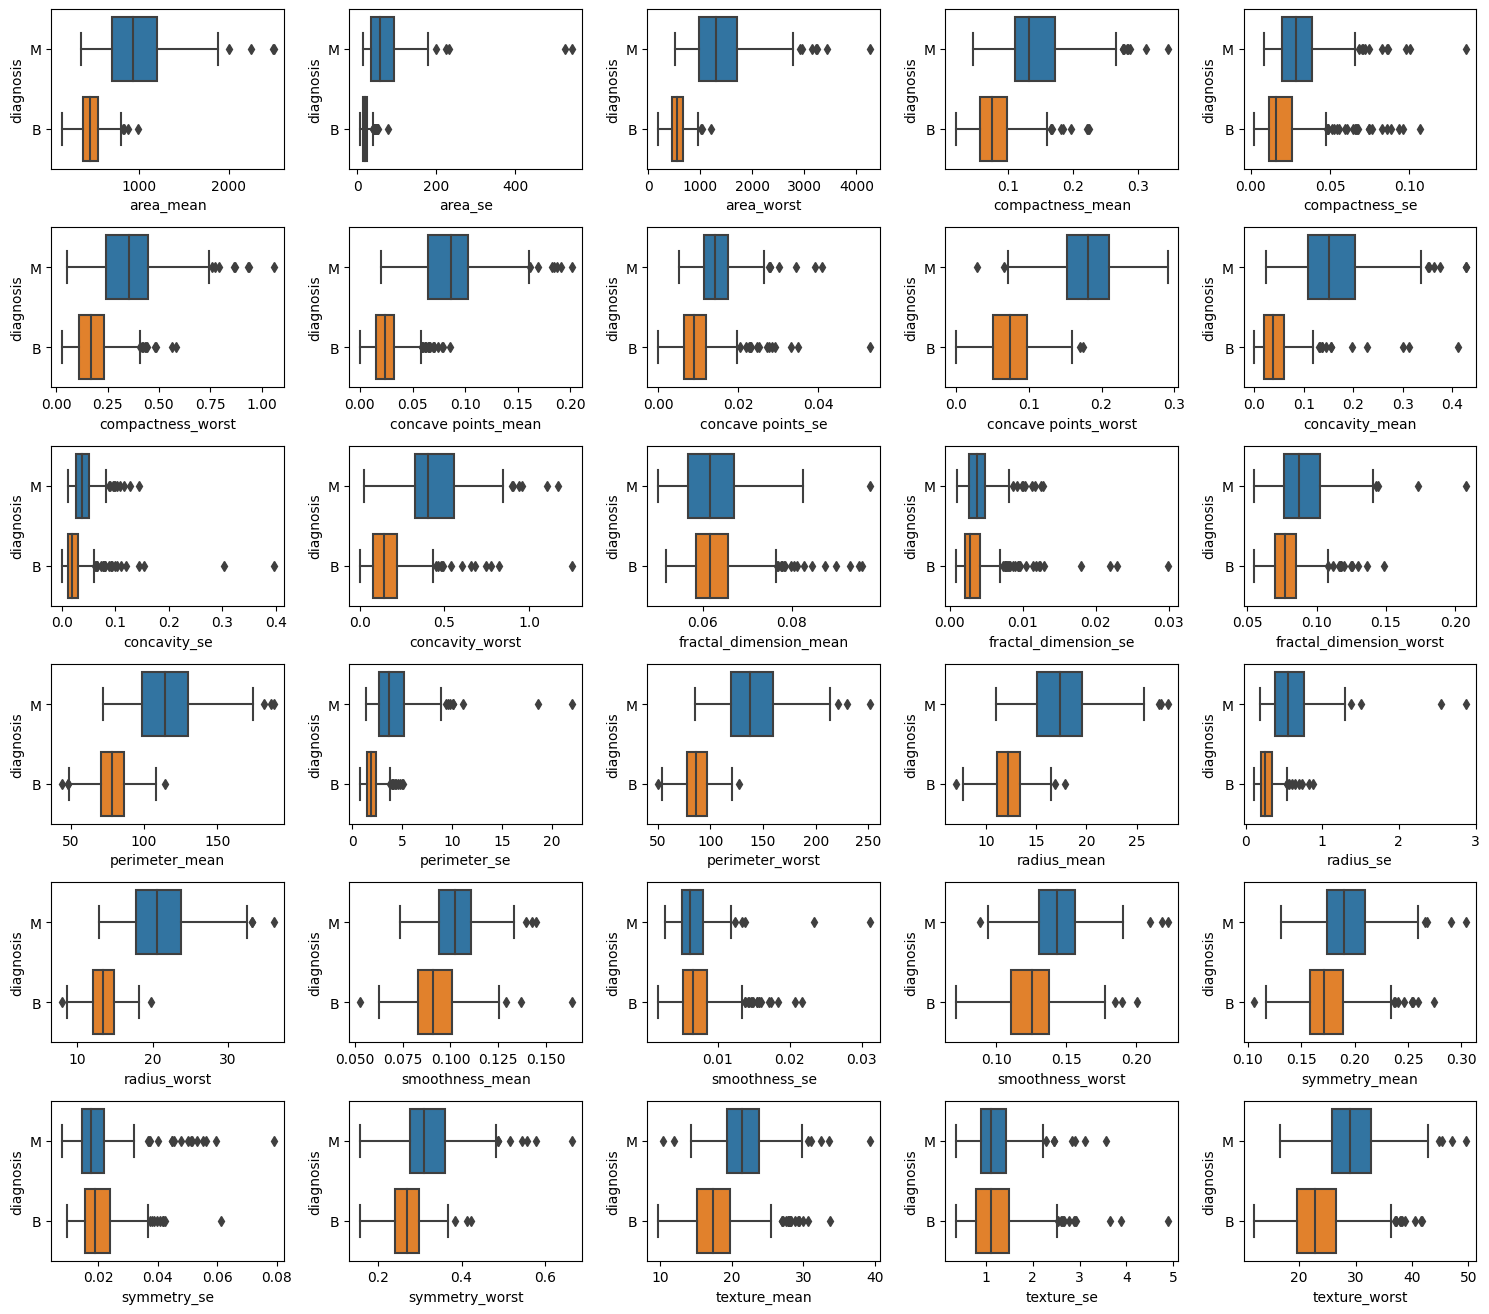

In [14]:
plot_hist = PlotFeatures(df, numerik_df.columns, combinations=False)
plot_hist.get_layout_axes()

plot_hist.plot_features(kind='boxplot', figsize=(15, 15), y='diagnosis')

In [15]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* area_se
* area_mean
* perimeter_se
* concavity_se
* radius_se
* smoothness_se
* radius_worst
* perimeter_worst
* area_worst

In [47]:
class Clean_Data:
  def __init__(self, data, target_columns):
    self.target_columns = target_columns
    self.data = data

  def detect_outlier(self):
    q1, q3, iqr, lower_limit, upper_limit = {}, {}, {}, {}, {}
    select_data = self.data[self.target_columns].quantile([.25, .75])

    for key, val in select_data.to_dict().items():  
      q1[key] = val[0.25]
      q3[key] = val[0.75]
      iqr[key] = q3[key] - q1[key]
      lower_limit[key], upper_limit[key] = q1[key] - 1.5*iqr[key], q3[key] + 1.5*iqr[key]

    self.lower_limit = lower_limit
    self.upper_limit = upper_limit
    self.q1 = q1
    self.q3 = q3
    self.iqr = iqr

  def remove_outlier(self):
    new_df = self.data.copy(deep=True)
    for col in self.target_columns:
      new_df = new_df[new_df[col].between(self.lower_limit[col], self.upper_limit[col])]

    return new_df

  @property
  def get_report(self):
    lower = np.array(list(self.lower_limit.values())).reshape(-1,1)
    upper = np.array(list(self.upper_limit.values())).reshape(-1,1)
    iqr = np.array(list(self.iqr.values())).reshape(-1,1)
    q1 = np.array(list(self.q1.values())).reshape(-1,1)
    q3 = np.array(list(self.q3.values())).reshape(-1,1)

    report_df = pd.DataFrame(
      np.c_[np.round(lower, 2), np.round(upper, 2), iqr, q1, q3], 
      columns=['lower limit', 'upper limit', 'iqr', 'q1', 'q3'], 
      index=self.lower_limit.keys()
    )
    report_df[['lower limit', 'upper limit']] = report_df[['lower limit', 'upper limit']].astype(float)
    
    self.report_df = report_df
    return report_df

  def plot_report(self, x, y):
    x_ = x
    y_ = y

    P_1 = self.report_df.loc[x_, 'lower limit']
    P_2 = self.report_df.loc[y_, 'lower limit']

    Q_1 = self.report_df.loc[x_, 'upper limit']
    Q_2 = self.report_df.loc[y_, 'upper limit']

    sns.scatterplot(data=self.data, x=x_, y=y_)
    plt.vlines(Q_1, P_2, Q_2, colors='k')
    plt.hlines(Q_2, P_1, Q_1, colors='k')
    
    plt.vlines(P_1, P_2, Q_2, colors='k')
    plt.hlines(P_2, P_1, Q_1, colors='k')

    plt.tight_layout()

In [17]:
target_cols_outlier = ['area_se','area_mean','perimeter_se','concavity_se','radius_se','smoothness_se','radius_worst','perimeter_worst','area_worst']
df[target_cols_outlier].quantile([0.97, 0.98, 0.99])

,area_se,area_mean,perimeter_se,concavity_se,radius_se,smoothness_se,radius_worst,perimeter_worst,area_worst
0.97,134.728,1418.52,7.73060,0.092626,1.05752,0.013848,27.2964,184.584,2231.80
0.98,154.936,1625.36,8.62740,0.101584,1.17020,0.015280,28.3244,195.576,2491.08
0.99,177.684,1786.60,9.69004,0.122292,1.29132,0.017258,30.7628,208.304,2918.16


In [48]:
clean_df = Clean_Data(df, target_cols_outlier)
clean_df.detect_outlier()
bc_df_fixed  = clean_df.remove_outlier()

clean_df.get_report

,lower limit,upper limit,iqr,q1,q3
area_se,-23.16,86.20,27.340000,17.850000,45.190000
area_mean,-123.30,1326.30,362.400000,420.300000,782.700000
perimeter_se,-1.02,5.98,1.751000,1.606000,3.357000
concavity_se,-0.03,0.08,0.026960,0.015090,0.042050
radius_se,-0.14,0.85,0.246500,0.232400,0.478900
smoothness_se,0.00,0.01,0.002977,0.005169,0.008146
radius_worst,4.34,27.46,5.780000,13.010000,18.790000
perimeter_worst,22.17,187.34,41.290000,84.110000,125.400000
area_worst,-337.75,1937.05,568.700000,515.300000,1084.000000


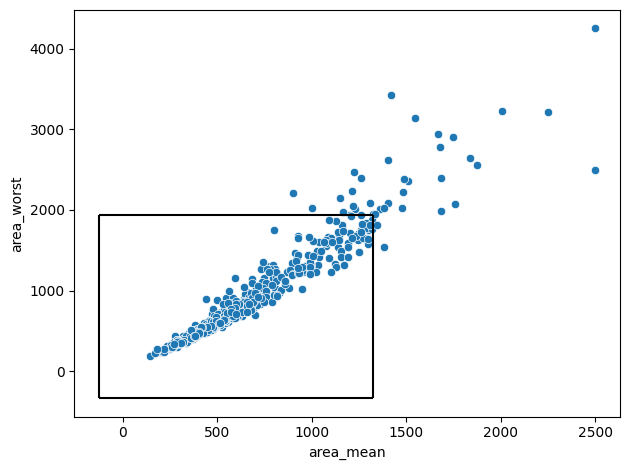

In [51]:
# comb_cols_outlier = combinations_with_replacement(target_cols_outlier, 2)
clean_df.plot_report('area_mean', 'area_worst')

In [20]:
bc_df_fixed.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,13.404533,18.959583,86.794123,573.782895,0.094545,0.092838,0.068876,0.038994,0.177054,0.062058,0.318445,1.155750,2.249434,27.522654,0.006486,0.021545,0.025913,0.010287,0.019416,0.003280,15.188542,25.388136,99.604890,738.852851,0.130595,0.234704,0.239657,0.102013,0.287305,0.082515
std,2.545558,4.291896,17.348455,227.377356,0.013866,0.043396,0.058482,0.028455,0.024647,0.006133,0.132595,0.529417,0.942509,15.882702,0.002056,0.012881,0.016979,0.004525,0.006679,0.001684,3.320942,6.137500,22.930797,336.853027,0.023213,0.148104,0.186215,0.056586,0.058992,0.017722
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.114400,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.707500,15.852500,75.022500,420.300000,0.084572,0.060475,0.026418,0.018927,0.160100,0.057655,0.220300,0.808725,1.526500,16.970000,0.005019,0.012037,0.013865,0.007024,0.014895,0.002102,13.025000,20.687500,84.057500,515.675000,0.113900,0.136325,0.104875,0.062172,0.248150,0.070517
50%,13.020000,18.505000,84.115000,520.100000,0.093925,0.082640,0.048765,0.029240,0.176000,0.061180,0.286650,1.046500,2.070500,22.335000,0.006059,0.017935,0.021805,0.009923,0.018175,0.002847,14.495000,25.090000,95.120000,639.200000,0.129700,0.196400,0.190250,0.087895,0.278950,0.078700
75%,14.765000,21.530000,96.145000,669.375000,0.103225,0.114825,0.098110,0.055990,0.192600,0.065340,0.396425,1.381250,2.765000,33.157500,0.007595,0.028748,0.034865,0.012930,0.021955,0.003951,16.825000,29.212500,113.100000,862.025000,0.143100,0.296175,0.334525,0.140875,0.315150,0.090133
max,20.590000,39.280000,137.800000,1320.000000,0.163400,0.283900,0.318900,0.146900,0.274300,0.097440,0.747400,4.885000,5.801000,83.500000,0.012430,0.074580,0.081580,0.034410,0.059630,0.011780,24.560000,49.540000,166.400000,1872.000000,0.222600,1.058000,1.170000,0.270100,0.663800,0.207500


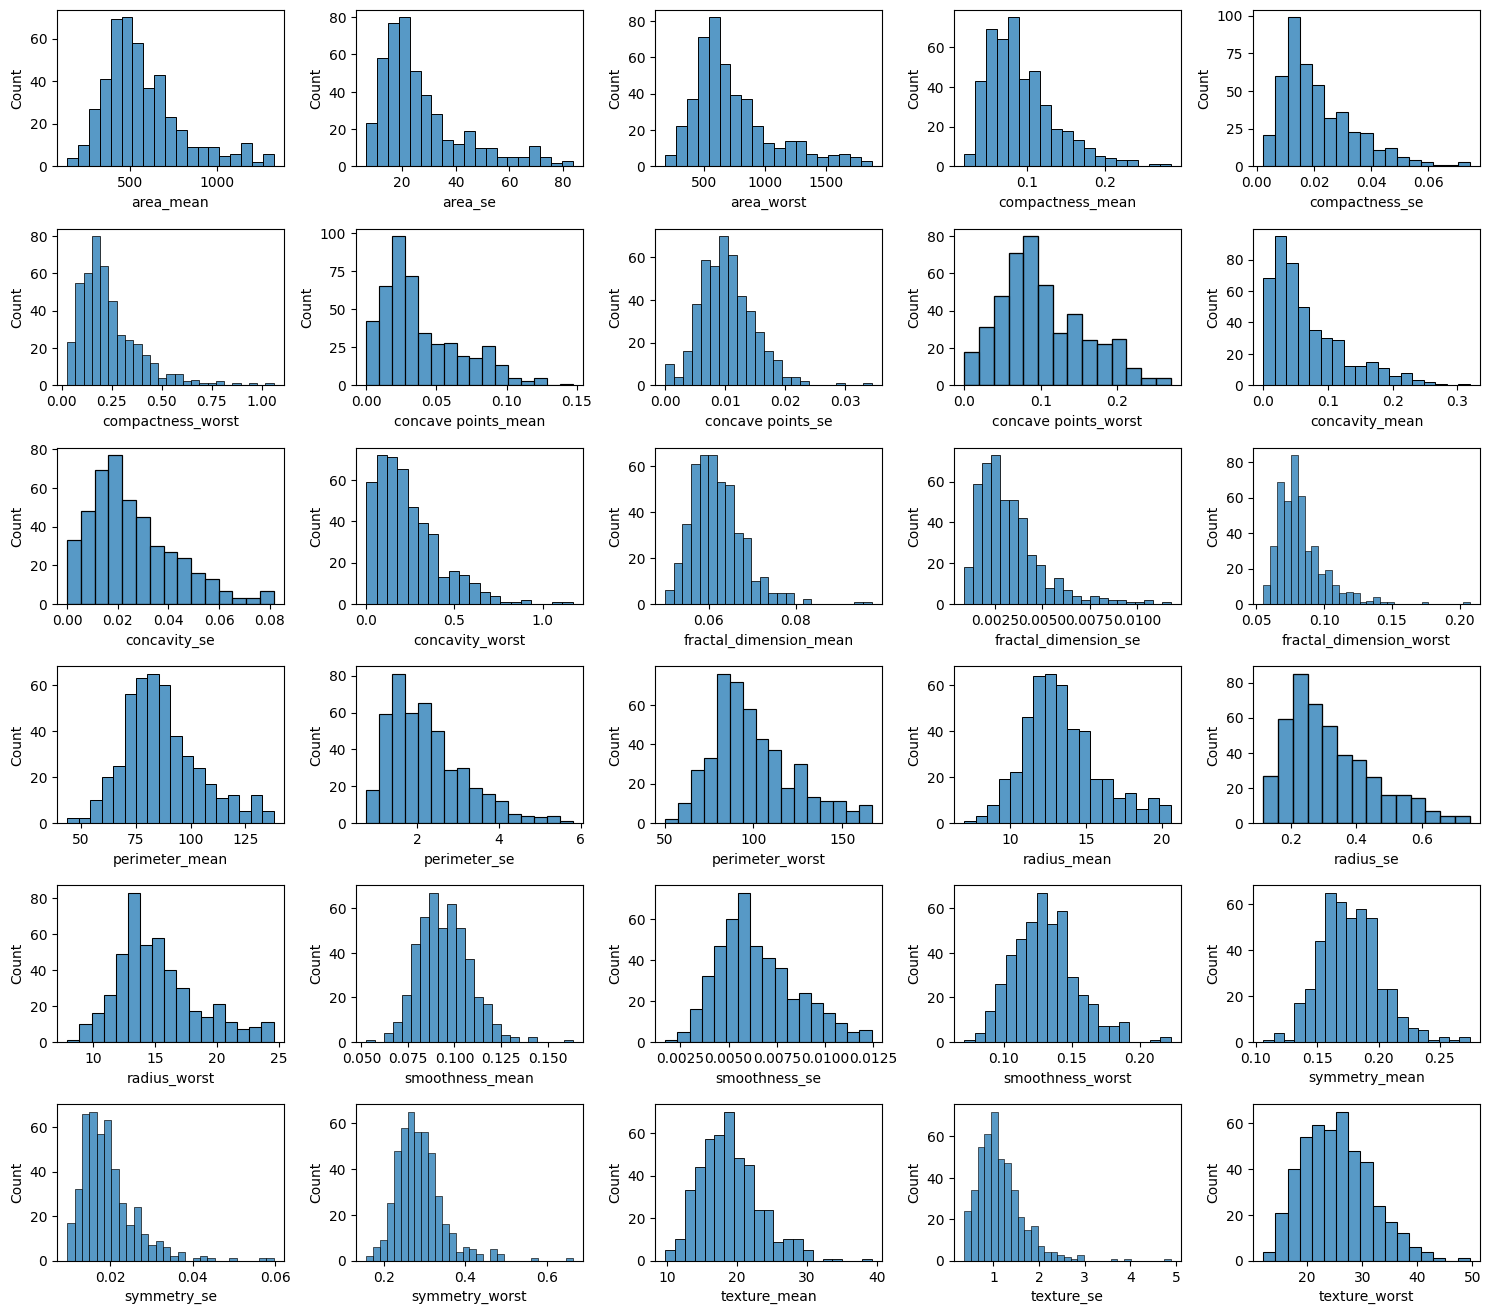

In [21]:
plot_hist = PlotFeatures(bc_df_fixed, numerik_df.columns, combinations=False)
plot_hist.get_layout_axes()

plot_hist.plot_features(kind='hist', figsize=(15,15))

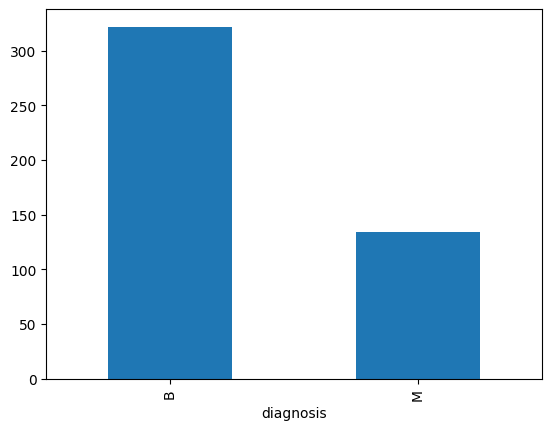

In [22]:
by_diagnosis = bc_df_fixed.groupby(by='diagnosis')
by_diagnosis.size().plot(kind='bar')
plt.show()

In [23]:
by_diagnosis[bc_df_fixed.columns].mean().T.sort_values(by=['B', 'M'], ascending=False)

diagnosis,B,M
area_worst,575.329193,1131.797761
area_mean,475.703416,809.466418
perimeter_worst,88.298012,126.775149
perimeter_mean,79.165062,105.126642
texture_worst,23.607795,29.666269
area_se,20.669317,43.991119
texture_mean,17.907919,21.486716
radius_worst,13.585885,19.039701
radius_mean,12.326575,15.994851
perimeter_se,1.919381,3.042545


In [24]:
dummy_df_1 = bc_df_fixed.copy(deep='True')

column_transformer = make_column_transformer(
    (OneHotEncoder(), kategori_df.drop(columns='diagnosis').columns),
    (MinMaxScaler(), numerik_df.columns)
) # membuat transformer untuk memudahkan dalam proses transformasi data

pipe = Pipeline([
   ("transform", column_transformer),
   ("nan_to_num", FunctionTransformer(np.nan_to_num, validate=False)) # mengambil features name saat di transformasi
])

X_1 = dummy_df_1.drop(columns=['diagnosis'])
y_1 = dummy_df_1['diagnosis']

X_1_transformed = pipe.fit_transform(dummy_df_1) # transformasi data X

features_name = [i.split('__')[1] for i in pipe.named_steps["transform"].get_feature_names_out()] # menghilangkan nama prepocessor-nya
X_1_df = pd.DataFrame(X_1_transformed, columns=features_name) # menampilkan dalam bentuk DataFrame

le = LabelEncoder()
y_1_transformed = le.fit_transform(y_1)

In [25]:
X_1_df.sample(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
140,0.428319,0.113290,0.398894,0.310497,0.313803,0.069409,0.028827,0.090538,0.241236,0.239469,0.275671,0.139166,0.202419,0.195416,0.636465,0.056852,0.075754,0.215286,0.022180,0.225646,0.342754,0.110075,0.312872,0.228539,0.297365,0.026351,0.023573,0.147723,0.042784,0.118064
263,0.390844,0.314846,0.362621,0.272758,0.275345,0.085589,0.024321,0.058101,0.284611,0.199874,0.109953,0.258973,0.087629,0.083940,0.575534,0.085444,0.085854,0.189538,0.196662,0.121927,0.325917,0.438166,0.294163,0.212888,0.336987,0.061346,0.030932,0.147464,0.194795,0.110710
82,0.450364,0.197836,0.461866,0.328687,0.786946,0.593982,0.649420,0.653574,0.513963,0.567818,0.436651,0.124558,0.327716,0.363217,0.508445,0.371474,0.670875,0.403371,0.118405,0.569875,0.503909,0.276652,0.482714,0.380602,0.759625,0.371210,0.544957,0.735283,0.311711,0.560050
156,0.385701,0.333108,0.369642,0.269868,0.390268,0.232459,0.131295,0.279578,0.546049,0.214195,0.377567,0.213446,0.307494,0.266474,0.541290,0.214827,0.171733,0.331299,0.109620,0.224452,0.391461,0.435501,0.359859,0.268674,0.473684,0.171639,0.117692,0.399852,0.217271,0.174207
3,0.494452,0.376057,0.493671,0.369231,0.598267,0.548616,0.293697,0.407420,0.674985,0.517060,0.741074,0.224717,0.614393,0.575739,0.661752,0.387651,0.304977,0.420808,0.106227,0.414985,0.549008,0.429638,0.518924,0.421982,0.622268,0.330753,0.228889,0.576083,0.321372,0.393263
331,0.307076,0.395671,0.288905,0.201275,0.443893,0.152729,0.028081,0.073247,0.329768,0.241786,0.271880,0.291239,0.240087,0.158909,0.484744,0.099408,0.085462,0.178989,0.347388,0.107044,0.266386,0.450426,0.248728,0.161726,0.376610,0.081022,0.030615,0.159422,0.277997,0.105194
330,0.420237,0.083192,0.394532,0.298768,0.317956,0.145773,0.074004,0.163513,0.310755,0.269377,0.175197,0.063097,0.152657,0.137787,0.412242,0.143485,0.111241,0.239204,0.151544,0.323301,0.343957,0.130597,0.325114,0.226286,0.397742,0.129435,0.080214,0.304480,0.238368,0.258914
260,0.664928,0.196145,0.659611,0.552231,0.381692,0.445033,0.377548,0.479306,0.428996,0.206403,0.351817,0.085617,0.371134,0.345094,0.384996,0.417515,0.455381,0.424005,0.102434,0.204516,0.651233,0.265458,0.637038,0.524544,0.477646,0.407981,0.423590,0.733432,0.286475,0.236588
374,0.197443,0.283734,0.183704,0.121377,0.275165,0.131937,0.046378,0.039272,0.368390,0.298231,0.358926,0.210352,0.300952,0.184855,0.864701,0.142656,0.126379,0.114327,0.347188,0.191471,0.193626,0.335821,0.178464,0.115604,0.446609,0.095284,0.054778,0.092558,0.293967,0.154574
186,0.991917,0.397362,0.943623,0.988100,0.279137,0.242326,0.283537,0.409939,0.241830,0.038121,0.905213,0.150460,0.869746,1.000000,0.582812,0.402030,0.521819,0.485615,0.077279,0.279113,0.979555,0.377132,0.959479,0.927674,0.340950,0.197737,0.269915,0.534987,0.132492,0.105457


In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_sm_1, y_sm_1 = smote.fit_resample(X_1_transformed, y_1_transformed)

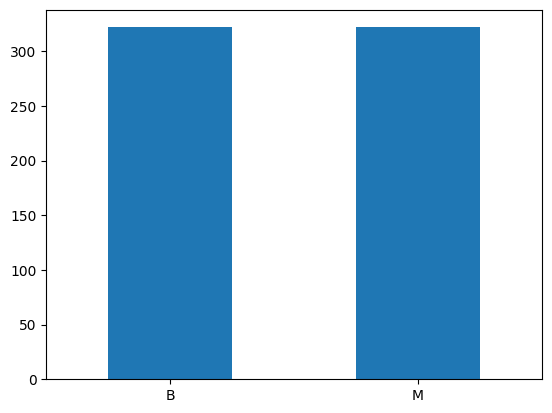

In [27]:
s = pd.Series(y_sm_1)
s.groupby(s).size().plot(kind='bar')
plt.xticks([0, 1], le.classes_, rotation=0)
plt.show()

In [28]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

f, p = f_classif(X_sm_1, y_sm_1)
mi = mutual_info_classif(X_sm_1, y_sm_1)

features_df = pd.DataFrame({
    'Features': X_1_df.columns,
    'F scores': f,
    'MI scores': mi
}).set_index('Features').sort_values(['F scores', 'MI scores'], ascending=False)

features_df.style.bar(subset=['F scores', 'MI scores'], color='grey')

,F scores,MI scores
Features,,
concave points_worst,1163.520897,0.459975
concave points_mean,1158.372471,0.454238
perimeter_worst,1066.096639,0.484389
radius_worst,932.485515,0.451854
area_worst,845.043053,0.461044
concavity_mean,797.596856,0.428896
perimeter_mean,662.724260,0.348169
concavity_worst,604.342102,0.363675
radius_mean,571.968538,0.327997


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sm_1,
    y_sm_1,
    test_size=.25,
    stratify=y_sm_1,
    random_state=42
)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

1    242
0    241
dtype: int64
0    81
1    80
dtype: int64


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

In [31]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [32]:
model_params=[
    {
        'model_name': 'DecisionTreeClassifier',
        'model': DecisionTreeClassifier()
    },
    {
        'model_name': 'RandomForestClassifier',
        'model': RandomForestClassifier()
    },
    {
        'model_name': 'LogisticRegression',
        'model': LogisticRegression()
    },
    {
        'model_name': 'SVM',
        'model': SVC()
    },
    {
        'model_name': 'KNeighborsClassifier',
        'model': KNeighborsClassifier()
    },
    {
        'model_name': 'MultinomialNB',
        'model': MultinomialNB()
    }
]

def tuning_models(X, y, model_params, model_name='model_name', model='model', max_splits=5, get_mean=False):
    rs = ShuffleSplit(n_splits=max_splits, test_size=.25, random_state=42)
    estimated_model = {}
    for idx in range(len(model_params)):
        cv_results = cross_validate(
            model_params[idx]['model'], X, y, cv=rs, scoring='accuracy'
        )
        estimated_model[model_params[idx]['model_name']]= cv_results['test_score']
    df_scoring = pd.DataFrame(estimated_model, index=[f'score {i}' for i in range(max_splits)])
    
    if get_mean:
        for col in df_scoring.columns:
            print(f'{col}: {df_scoring[col].mean()}')
    else:
        return df_scoring

In [33]:
display(tuning_models(X_train, y_train, model_params, 'model_name', 'model', 30))
print(tuning_models(X_train, y_train, model_params, 'model_name', 'model', 30, get_mean=True))

,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,SVM,KNeighborsClassifier,MultinomialNB
score 0,0.950413,0.958678,0.966942,0.975207,0.950413,0.826446
score 1,0.909091,0.958678,0.975207,0.966942,0.966942,0.818182
score 2,0.909091,0.958678,0.966942,0.975207,0.950413,0.859504
score 3,0.909091,0.958678,0.958678,0.975207,0.958678,0.876033
score 4,0.950413,0.983471,0.983471,0.983471,0.983471,0.917355
score 5,0.950413,0.966942,0.975207,0.983471,0.966942,0.859504
score 6,0.909091,0.966942,0.958678,0.966942,0.950413,0.867769
score 7,0.909091,0.983471,0.983471,1.000000,0.966942,0.851240
score 8,0.925620,0.942149,0.942149,0.950413,0.933884,0.809917
score 9,0.900826,0.933884,0.958678,0.975207,0.966942,0.859504


DecisionTreeClassifier: 0.9303030303030301
RandomForestClassifier: 0.965840220385675
LogisticRegression: 0.9672176308539944
SVM: 0.9754820936639117
KNeighborsClassifier: 0.9614325068870523
MultinomialNB: 0.8553719008264464
None


In [34]:
help(SVC())

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each


In [35]:
scores = []

clf = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid={   
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [100, 10, 1, 0.1, 0.01, 0.001],
        'degree': [0, 1, 2, 3, 4, 5, 6],
        'decision_function_shape': ['ovo', 'ovr']
    },
    cv=30,
    n_jobs=4,
    return_train_score=False
)
clf.fit(X_train, y_train)
scores.append({
    'model': 'SVM',
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

In [37]:
cv_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
cv_df.loc[0, 'best_params']

{'C': 0.1,
 'decision_function_shape': 'ovo',
 'degree': 2,
 'gamma': 10,
 'kernel': 'poly'}

In [38]:
from sklearn.metrics import accuracy_score

get_best_random = {}
for i in range(50):
    model = SVC(
        C = 0.1, 
        decision_function_shape='ovo',
        degree=2, 
        gamma=10, 
        kernel= 'poly', 
        random_state=i
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    get_best_random[i] = accuracy_score(y_test, y_pred)

In [39]:
idx = max(get_best_random, key=get_best_random.get)
print(f'{idx}: {get_best_random[idx]}')

0: 0.9813664596273292


In [40]:
from sklearn.metrics import classification_report

model = SVC(
    C = 10, 
    decision_function_shape='ovo',
    degree=2, 
    gamma=1, 
    kernel= 'poly', 
    random_state=0
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.96      1.00      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



In [41]:
series_pred = pd.Series(le.inverse_transform(y_pred))
series_pred.sample(10)

115    B
95     M
48     M
39     M
126    B
102    B
148    M
105    B
21     B
140    M
dtype: object

In [42]:
series_test = pd.Series(le.inverse_transform(y_test))
series_test.sample(10)

13     B
137    M
107    M
27     B
42     M
35     B
37     M
105    B
26     M
150    M
dtype: object

In [43]:
test_pred_df = pd.concat([series_test, series_pred], axis='columns', keys=['test', 'predicted'])
test_pred_df.sample(10)

,test,predicted
125,B,B
147,B,B
76,M,M
118,M,M
120,B,B
54,B,B
12,B,B
123,M,M
10,M,M
152,B,B


In [44]:
def plot_confusion_matrix(
    matrix,
    class_labels=False,
    figsize=(16, 8), 
    y_ticks_rot=0, 
    x_ticks_rot=0, 
    fs_title=20, 
    fs_label=14, 
    pallete=plt.cm.magma
):
    norm = matrix.sum(axis=1, keepdims=True)

    percentages = ((matrix / norm) * 100).ravel()
    matrices = matrix.ravel()

    cm = np.array([f'{val}\n{percentage:.2f}%' for percentage, val in zip(percentages, matrices)]).reshape(matrix.shape)

    plt.figure(figsize=figsize)

    if class_labels:
        values_labels = [val for val in class_labels.values()]
    else:
        values_labels = "auto"

    sns.heatmap(
        matrix, 
        annot=cm, 
        cmap=pallete, 
        fmt='s', 
        xticklabels=values_labels, 
        yticklabels=values_labels
    )
    plt.xticks(rotation=x_ticks_rot)
    plt.yticks(rotation=y_ticks_rot)
    plt.ylabel('True Label', fontsize=fs_label)
    plt.xlabel('Predicted Label', fontsize=fs_label)
    plt.title('confusion matrix', fontsize=fs_title)
    plt.show()

In [45]:
from sklearn.metrics import confusion_matrix

y_pred = np.round(model.predict(X_test).ravel())
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[78,  3],
       [ 0, 80]])

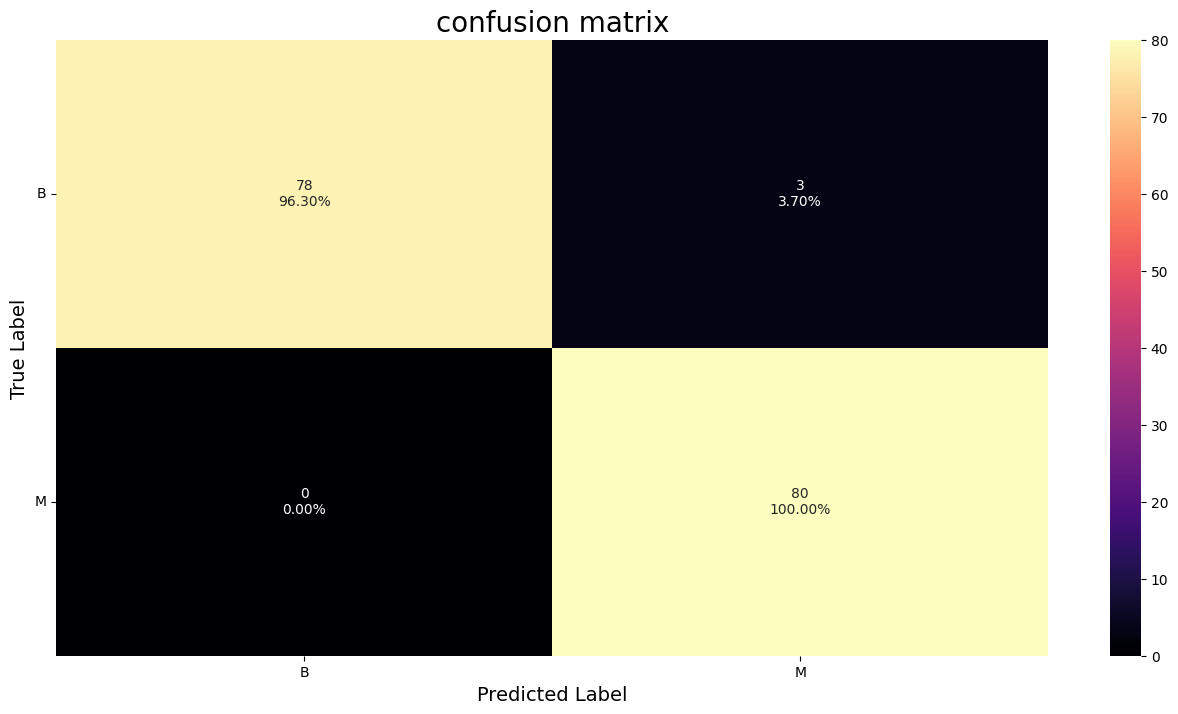

In [46]:
labels = {i:val for i, val in enumerate(le.classes_)}
plot_confusion_matrix(matrix, pallete=plt.cm.magma, class_labels=labels)